In [ ]:
pip install pandas matplotlib seaborn geopandas plotly


In [ ]:
import zipfile
import pandas as pd
import os

In [ ]:
# Step 1: Upload the ZIP
from google.colab import files
uploaded = files.upload()  # Upload ZIP (e.g., "data.zip")


Saving globalterrorismdb_0718dist.tar.bz2 to globalterrorismdb_0718dist.tar.bz2


In [ ]:
# Load the compressed CSV
df = pd.read_csv('globalterrorismdb_0718dist.tar.bz2', compression='bz2', low_memory=False)


In [ ]:
columns = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
    'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
    'weaptype1_txt', 'nkill', 'nwound', 'suicide', 'success', 'gname'
]

df = df[columns]
df.dropna(subset=['iyear', 'latitude', 'longitude'], inplace=True)


<ipython-input-17-ad7b1c931211>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='iyear', palette='viridis')


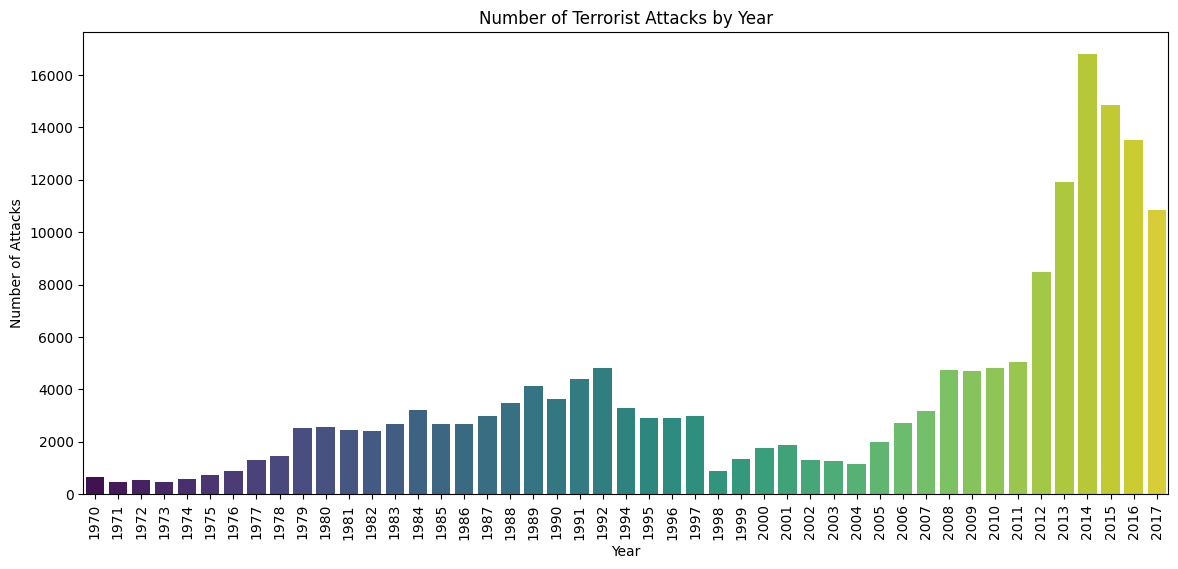

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='iyear', palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


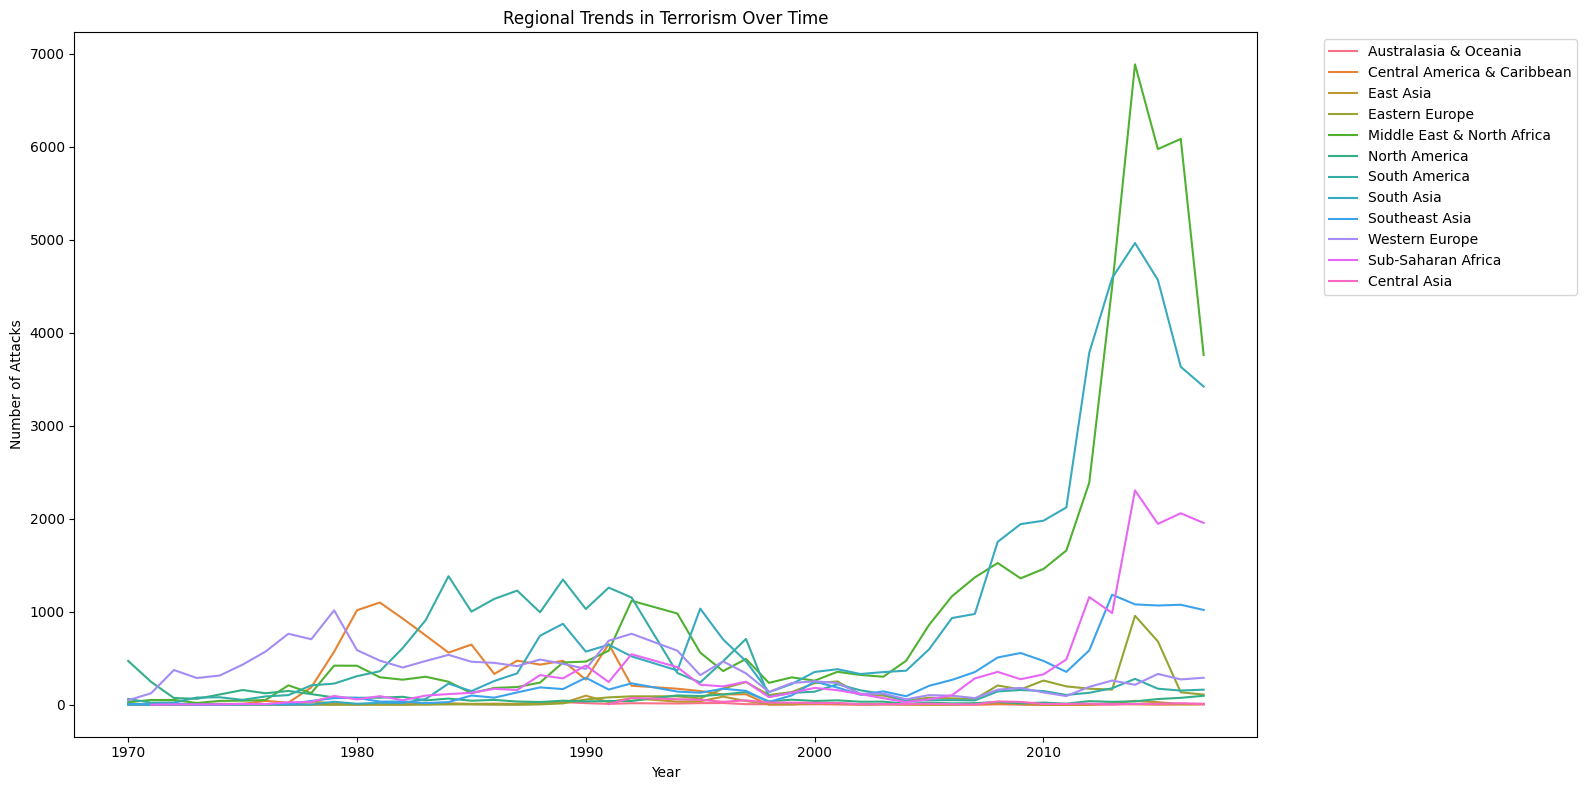

In [ ]:
regional_trend = df.groupby(['iyear', 'region_txt']).size().reset_index(name='count')
plt.figure(figsize=(16, 8))
sns.lineplot(data=regional_trend, x='iyear', y='count', hue='region_txt')
plt.title('Regional Trends in Terrorism Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


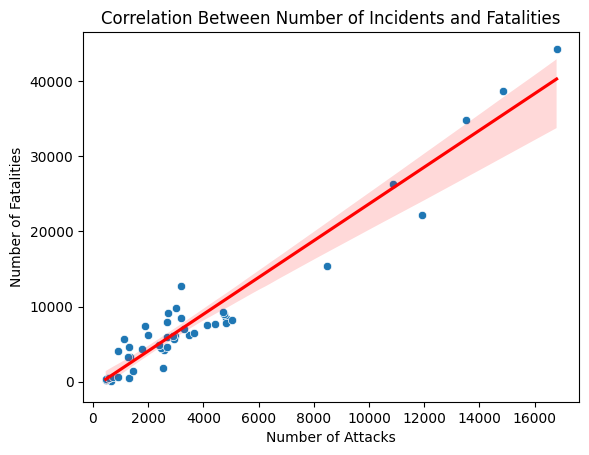

In [ ]:
casualties = df.groupby('iyear').agg({'nkill': 'sum'}).reset_index()
incidents = df.groupby('iyear').size().reset_index(name='attacks')

combined = pd.merge(casualties, incidents, on='iyear')

sns.scatterplot(data=combined, x='attacks', y='nkill')
sns.regplot(data=combined, x='attacks', y='nkill', scatter=False, color='red')
plt.title('Correlation Between Number of Incidents and Fatalities')
plt.xlabel('Number of Attacks')
plt.ylabel('Number of Fatalities')
plt.show()


<ipython-input-20-926ed14db707>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='magma')


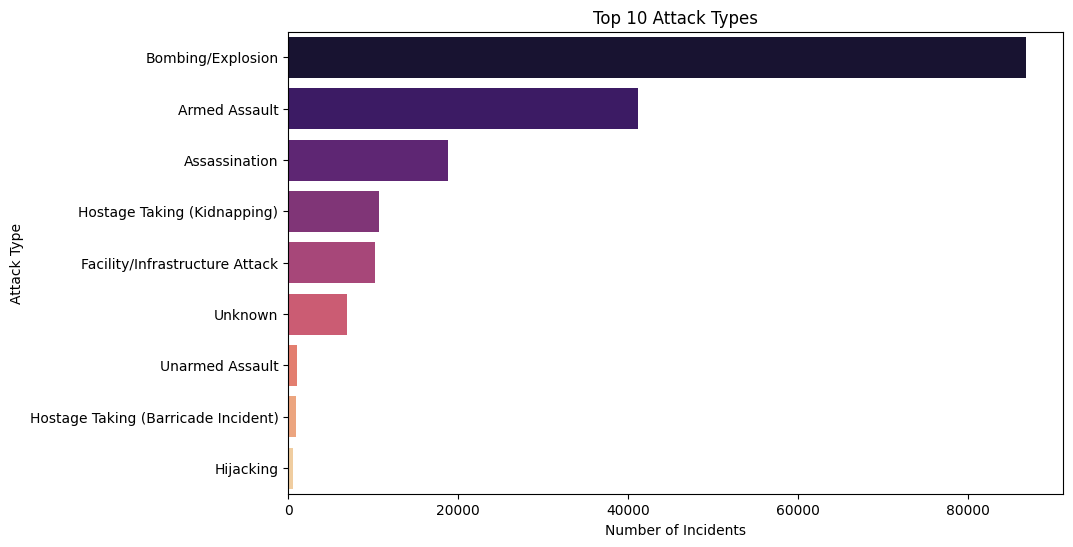

In [ ]:
attack_counts = df['attacktype1_txt'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.values, y=attack_counts.index, palette='magma')
plt.title('Top 10 Attack Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Type')
plt.show()


In [ ]:
import plotly.express as px

sample_df = df.sample(n=1000, random_state=42)  # subset for faster plotting
fig = px.scatter_geo(
    sample_df,
    lat='latitude',
    lon='longitude',
    color='region_txt',
    hover_name='country_txt',
    scope='world',
    title='Sample Global Terrorism Incidents'
)
fig.show()
